In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand

In [2]:
def sigmoid(x):
    s = 1.0/(1.0 + np.exp(-x))
    return s

In [3]:
def softmax(x):

    e = np.exp(x)
    s = np.divide(e, np.sum(e, axis=0))

    return s

In [4]:
def one_hot_encoding(y, m):

    encoded_matrix = np.zeros((m, 10))

    for i in range(m):
        # print(y[0, i])
        encoded_matrix[i, y[0, i]] = 1.0
      
    return encoded_matrix

In [5]:
def forward_propagation(w1, w2, b1, b2, a0):
    z1 = np.dot(w1, a0) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)

    return a1, a2

In [6]:
def backward_propagation(a1, a2, x, y, m, w2):

    dz2 = a2 - y
    dw2 = (1.0/m)*np.dot(dz2, a1.T)
    db2 = (1.0/m) * np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(w2.T, dz2)*(a1*(1-a1))
    dw1 = (1.0/m) * np.dot(dz1, x.T)
    db1 = (1.0/m) * np.sum(dz1, axis=1, keepdims=True)

    return dw1, dw2, db1, db2

In [64]:
def calc_accuracy(actual, test, w1, w2, b1, b2, m):

    a1m, a2m = forward_propagation(w1, w2, b1, b2, test)
    sm = softmax(a2m)
    
    testing = np.zeros(sm.shape).T

    max_val_pos = np.argmax(sm, axis=0)
    for i in range(m):
        testing[i, max_val_pos[i]] = 1

    num_correct = np.sum(np.all(testing == actual, axis=1))
    print(num_correct/m)      

0.5307307582402419


[0.08509719 0.0852061  0.08950682 0.08504964 0.08743168 0.08514389
 0.22440397 0.08506488 0.08666894 0.08642689] 6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
0.9282857142857143
[0.09062465 0.09068056 0.09161345 0.0905378  0.1319479  0.10592405
 0.12394701 0.09052989 0.09354739 0.09064731] 4 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0.902


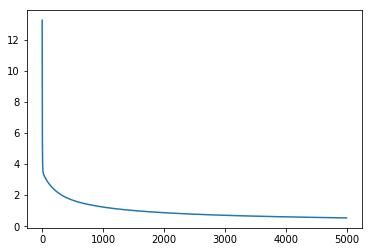

In [78]:
def gradient_descent():
    data = pd.read_csv('ex3_train.csv')
    x = data.drop('y', axis=1).T
    y = data['y'].values.reshape(1, -1)
    m = y.shape[1]

    cost = []
    
    alpha = 0.1
    epochs = 5000
    
    # init weights and bias
    np.random.seed(1)
    # w1 = np.random.rand(25, 400) * 0.01
    w1 = np.random.uniform(-1, 1, (25, 400)) 
    b1 = np.zeros((25, 1))
    # b1 = np.ones((25, 1))
    # w2 = np.random.rand(10, 25) * 0.01
    w2 = np.random.uniform(-1, 1, (10, 25))
    # b2 = np.ones((10, 1))
    b2 = np.zeros((10, 1))

    y = one_hot_encoding(y, y.shape[1]).T
    
    for epoch in range(epochs):
        
        a1, a2 = forward_propagation(w1, w2, b1, b2, x)

        loss = -(1.0/m) * np.sum(np.multiply(y, np.log(a2)) + np.multiply(1.0 - y, np.log(1 - a2))) 

        loss = np.squeeze(loss)
        cost.append(loss)
         
        dw1, dw2, db1, db2 = backward_propagation(a1, a2, x, y, m, w2)

        w1 = w1 - (alpha * dw1)
        b1 = b1 - (alpha * db1)
        w2 = w2 - (alpha * dw2)
        b2 = b2 - (alpha * db2)

    plt.plot(np.squeeze(cost))
    print(cost[-1])
    
    # test training data
    train_data = pd.read_csv('ex3_train.csv')
    train = train_data.drop('y', axis=1).T
    actual_vals = train_data['y'].values.reshape(1, -1)
    actual_vals = one_hot_encoding(actual_vals, m)
    calc_accuracy(actual_vals, train, w1, w2, b1, b2, m)
    
    # test test data
    test_data = pd.read_csv('ex3_test.csv')
    test = test_data.drop('y', axis=1).T
    actual_vals = test_data['y'].values.reshape(1, -1)
    m = actual_vals.shape[1]
    actual_vals = one_hot_encoding(actual_vals, m)
    calc_accuracy(actual_vals, test, w1, w2, b1, b2, m)
    return


gradient_descent()